# url: https://data-analysis-stats.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92/scikit-learn%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E9%9A%8E%E5%B1%A4%E7%9A%84%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0-hierarchical-clustering%E3%81%AE%E8%A7%A3%E8%AA%AC/

# Scikit-learnを用いた階層的クラスタリング (Hierarchical clustering)の解説

## 1.1 階層的クラスタリング (hierarchical clustering)とは
階層的クラスタリングとは、個体からクラスターへ階層構造で分類する分析方法の一つです。樹形図（デンドログラム）ができます。デンドログラムとは、クラスター分析において各個体がクラスターにまとめられていくさまを樹形図の形で表したもののことです。ツリーのルートは、すべてのデータをクラスターで分類しており、一番下の部分は1件のデータになっています。

左側の図はクラスタリングする前のデータ分布で例えばこれを階層型クラスタリングしたものが右側の図になります(gifで過程が見えるようになっています)。この樹形図のグラフをよく階層型クラスターと呼びます。



## 1.2 階層的クラスタリングの長所と短所
クラスタリング手法の中でもkmeanのような非階層型クラスタリングと比べた時に以下のメリットとデメリットがあります。

    長所
    ・特定の数のクラスター（すなわち、k平均）の仮定なし
    ・可視化でクラスタリングの様子が自分で確認できる

    短所
    ・ノイズや外れ値に敏感です。
    ・分類の対象が多い場合はkmeanよりも遅くなりがちなことがある。

代表的な階層型クラスタリングアルゴリズムには2つあります。

    凝集性（Agglomerative）—ボトムアップアプローチ。 多くの小さなクラスターから始め、それらを結合して大きなクラスターを作成します。

    分割型（Divisive） —トップダウンアプローチ。 小さなクラスターに分割するのではなく、単一のクラスターから始めます。

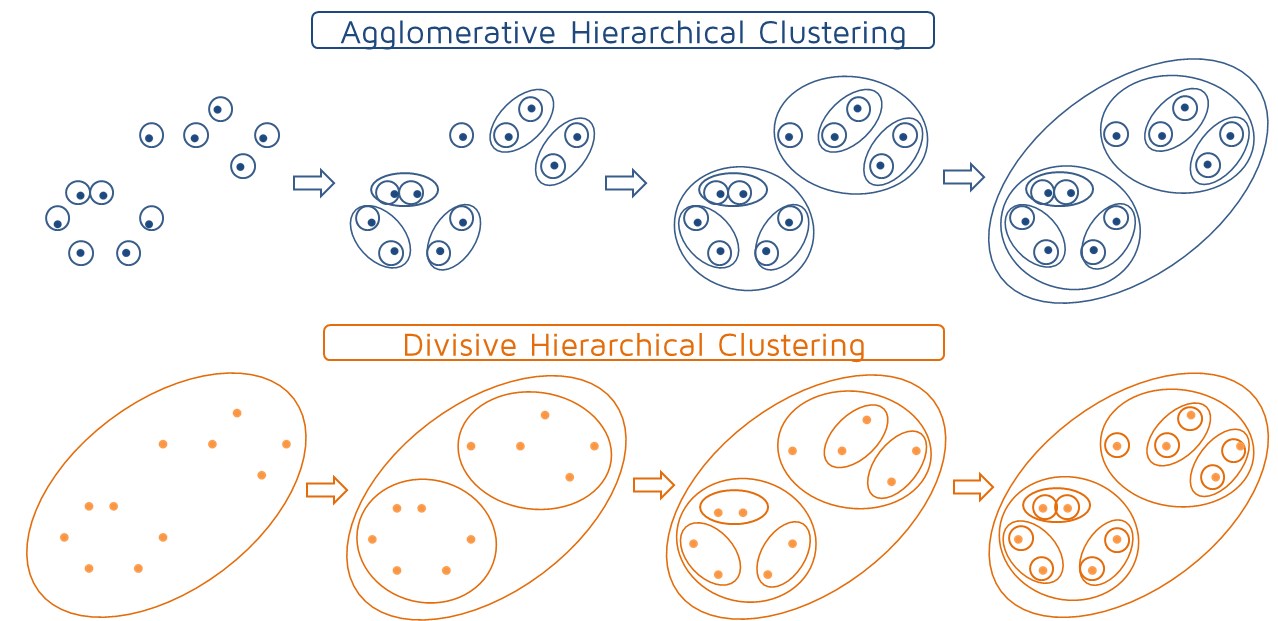

## 1.3 凝集クラスタリングの作成手順
1. 個々のデータが，それぞれ孤立したクラスタを形成している状態から開始します。
2. 全てのクラスタ対の間の距離を計算し，最も近いクラスタ対を見つけます。最も近いクラスタを併合し，この新しいクラスタにします。
3. クラスタが1つだけになるまで、手順2を繰り返します。

## 1.4 sklearn のAgglomerativeClustering
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, distance_threshold=None)

    n_clustersint or None, default=2
    クラスターの数。

    affinitystr or callable, default=’euclidean’
    「ユークリッド」、「マンハッタン」、「コサイン」などの距離のパラメーターです。

    memorystr or object with the joblib.Memory interface, default=None
    ツリーの計算の出力をキャッシュするために使用されます。使うと高速になりまうす。

    connectivityarray-like or callable, default=None
    各サンプルについて、データの特定の構造に従って、隣接するサンプルを定義します。

    compute_full_tree‘auto’ or bool, default=’auto’
    n_clustersでツリーの数に停止します。 これは、クラスターの数がサンプルの数と比較して多い場合に、計算時間を短縮するのに役立ちます。

    linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
    リンケージアルゴリズムは、観測セット間で使用する距離を決定します。

    distance_thresholdfloat, default=None
    距離がこのしきい値を超えている場合、クラスターはマージされません。

## 1.5 距離メトリック　(Affinity)
データポイント間の距離の計算に使用する方法は、最終結果に影響します。

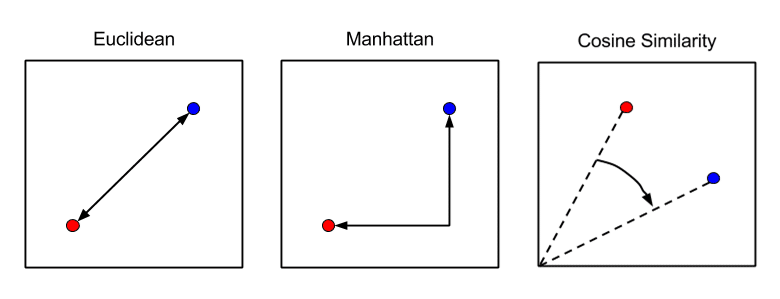

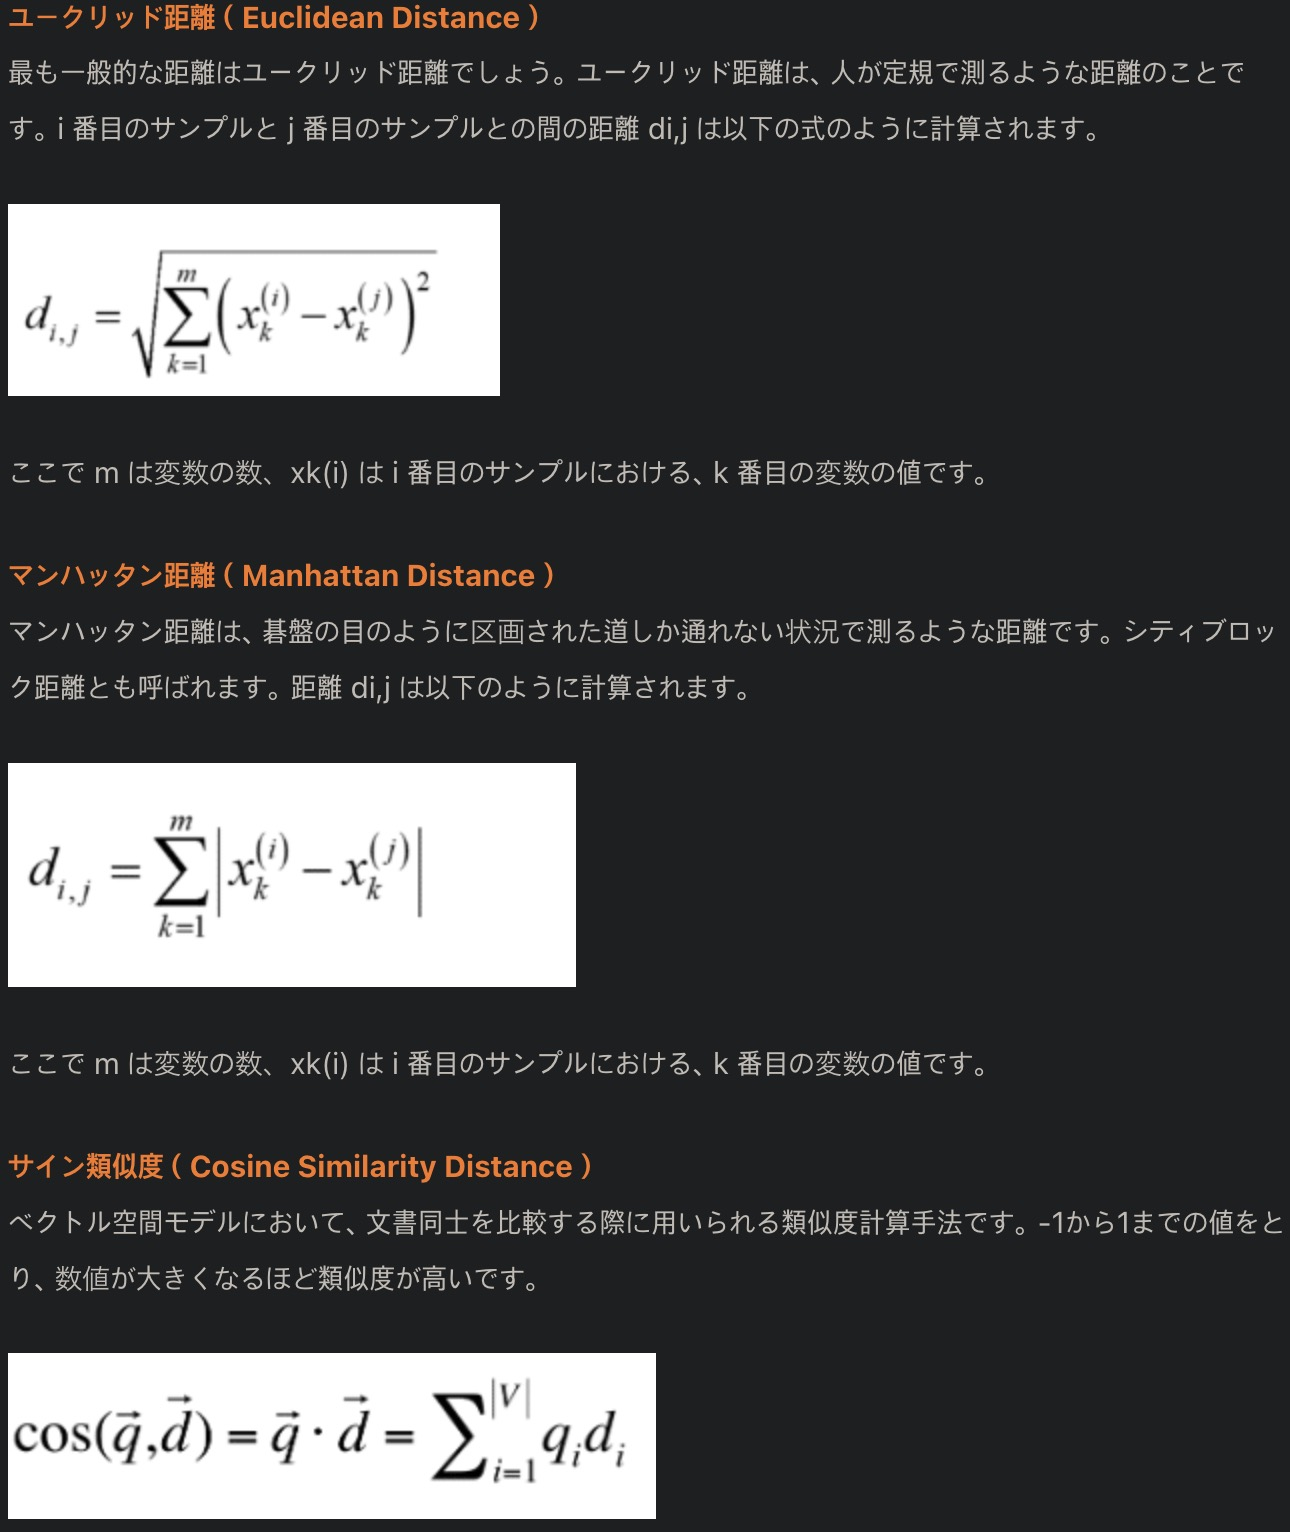

## 1.6 距離の計算（linkage）
クラスター間の距離の計算方法です。基本的には、Ward法が用いられます。

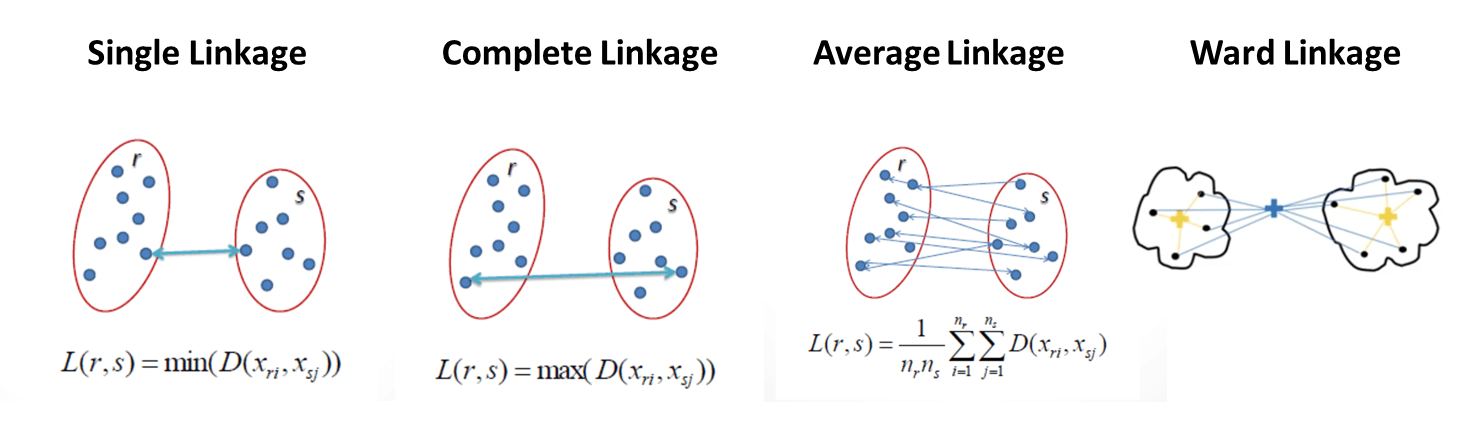

### 単リンク法 （Single Linkage）
2つのクラスタの距離は、各クラスター内の2点間の最短距離です。単一のリンケージは、クラスターのペアの最も近い観測間の距離を最小化します。

### 完全リンク法（Complete Linkage）
2つのクラスタの距離は、各クラスターの2つのポイント間の最長距離です。 最大または完全なリンケージは、クラスターのペアの観測間の最大距離を最小化します。

### 平均法（Average Linkage）
クラスターの距離は、1つのクラスター内の各ポイントから他のクラスター内のすべてのポイントまでの平均距離です。 平均リンケージは、クラスターのペアのすべての観測間の距離の平均を最小化します。

### ウォード法（Ward Linkage）
クラスターの距離は、すべてのクラスター内の差の2乗の合計です。 ウォード法は、すべてのクラスター内の差の2乗の合計を最小化します。

## 2. 実験・コード

環境の概要

    環境：Google Colab
    データセット：Iris (アヤメ属) に属する 3 品種、setosa、versicolor、versinicaの特徴量測定値とクラスデータが収められています。
    実験：Euclidean、Manhattan、Euclidean

## 2.1 環境の準備

ライブラリのインポート

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

## 2.2 データロード
Irisデータセットはアヤメの種類と特徴量に関するデータセットです。3種類のアヤメの分類をやっているのは、Euclidean以外が上手く下のほうで３つに別れている事がわかります。

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
X.shape

(150, 4)

In [4]:
# 可視化関数を作成

def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

   # Plot the corresponding dendrogram
   dendrogram(linkage_matrix, **kwargs)

## 2.3 Euclideanモデル学習・可視化

In [5]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean',
linkage='ward',
distance_threshold=0,
n_clusters=None)

model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## デンドログラム

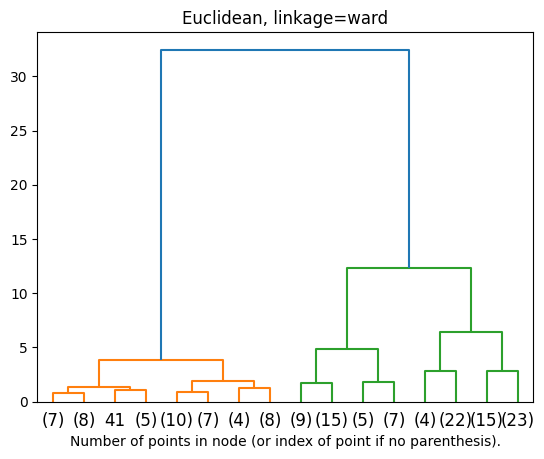

In [6]:
plt.title('Euclidean, linkage=ward')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 2.4 Manhattanモデル学習・可視化

In [7]:
model = AgglomerativeClustering(affinity='manhattan',
linkage='average',
distance_threshold=0,
n_clusters=None)

model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


デンドログラム

Manhattan のアルゴリズムによって、距離が短くになります。

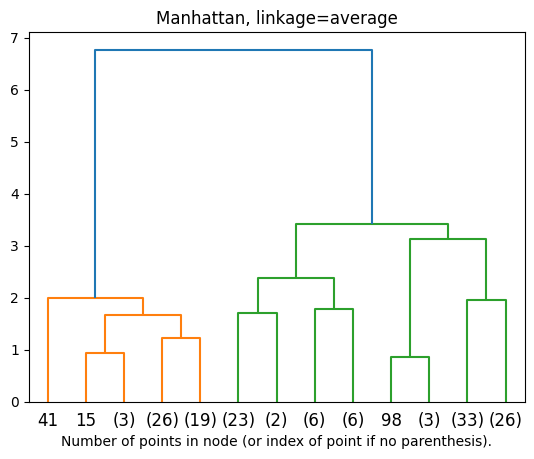

In [8]:
plt.title('Manhattan, linkage=average')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 2.5 Cosineモデル学習・可視化

In [9]:
model = AgglomerativeClustering(affinity='cosine',
linkage='average',
distance_threshold=0,
n_clusters=None)

model = model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


デンドログラム

Cosineのアルゴリズムによって、距離が長くになります。

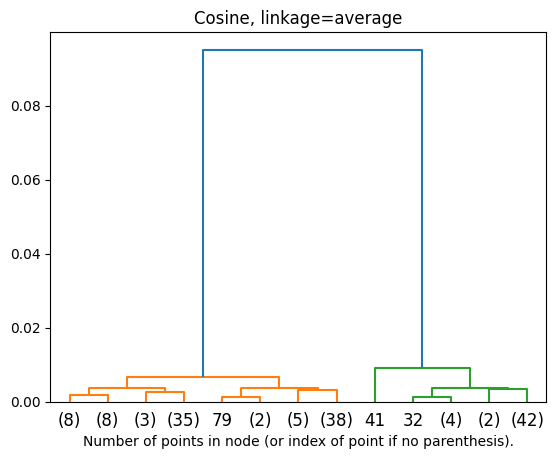

In [10]:
plt.title('Cosine, linkage=average')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()